In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal, List
from sklearn.model_selection import train_test_split

In [2]:
ds = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
classes = max(ds.targets) + 1

Files already downloaded and verified


In [3]:
targets = np.array(ds.targets, dtype=np.uint8)

In [4]:
print(ds.data.shape)

(50000, 32, 32, 3)


In [5]:
def get_img_num_per_cls(
        length_of_dataset: int,
        cls_num: int,
        imb_type: Literal['exp', 'step'],
        imb_factor: float,
        reverse: bool) -> List[int]:
    """
    Get the number of images per class.
    """
    img_max = length_of_dataset // cls_num
    img_num_per_cls = []
    if imb_type == 'exp':
        for cls_idx in range(cls_num):
            if reverse:
                num = img_max * (imb_factor**((cls_num - 1 - cls_idx) / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
            else:
                num = img_max * (imb_factor**(cls_idx / (cls_num - 1.0)))
                img_num_per_cls.append(int(num))
    elif imb_type == 'step':
        for cls_idx in range(cls_num // 2):
            img_num_per_cls.append(int(img_max))
        for cls_idx in range(cls_num // 2):
            img_num_per_cls.append(int(img_max * imb_factor))
    else:
        img_num_per_cls.extend([int(img_max)] * cls_num)
    return img_num_per_cls


In [6]:
img_num_per_cls = get_img_num_per_cls(length_of_dataset=len(ds), cls_num=classes, imb_type='exp', imb_factor=0.1, reverse=False)
print(img_num_per_cls)

[5000, 3871, 2997, 2320, 1796, 1391, 1077, 834, 645, 500]


<BarContainer object of 10 artists>

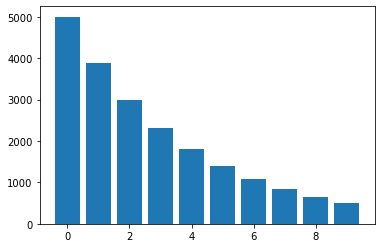

In [13]:
plt.bar(range(classes), img_num_per_cls)

In [ ]:
indices = [np.squeeze(np.argwhere(targets == i)) for i in range(classes)]

In [ ]:
np.random.seed(113)
tmp = np.array(img_num_per_cls)
np.random.shuffle(tmp)
for i in range(len(indices)):
    np.random.shuffle(indices[i])
    indices[i] = indices[i][:tmp[i]]

In [ ]:
idx = np.sort(np.concatenate(indices))
idx.shape

In [ ]:
data_lt = ds.data[idx]
targets_lt = targets[idx]

In [ ]:
print(np.bincount(targets_lt))

In [ ]:
test_ds = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [ ]:
np.savez_compressed(
    'imb_cifar10.npz',
    train_images=data_lt,
    train_labels=targets_lt,
    test_images=test_ds.data,
    test_labels=np.array(test_ds.targets, dtype=np.uint8)
)